# Reto - Titanic: Machine Learning from Disaster

---

### Lautaro Gabriel Coteja - A01571214
### Daniela Jiménez Téllez - A01654798
### Andrés Villarreal González - A00833915
### Héctor Hibran Tapia Fernández - A01661114

---

Link del repositorio:

https://github.com/Lautaro000/Inteligencia-Artificial-Avanzada-para-la-Ciencia-de-Datos-I

---

## Importación de librerías

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

plt.style.use("dark_background")

## Importación de datos

#### Recordamos que se descompone de la siguiente forma el dataset:

- train: Contiene las 12 columnas del dataset, solo tenemos del pasajero 1 al 891.
- test: Contiene 11 columnas del dataset, se quitó "Survived", tenemos del pasajero 892 al 1309.
- gender_submission: Contiene la columna "Survived" del test, con los mismos pasarejos, se usará como comparación de respuesta al finalizar el modelo.

| Variable  | Definición                              | Clave                                                  |
|-----------|-----------------------------------------|--------------------------------------------------------|
| survival  | Supervivencia                           | 0 = No, 1 = Sí                                         |
| pclass    | Clase de ticket                         | 1 = 1ª, 2 = 2ª, 3 = 3ª                                 |
| sex       | Sexo                                    |                                                        |
| Age       | Edad en años                            |                                                        |
| sibsp     | Nº de hermanos / cónyuges a bordo       |                                                        |
| parch     | Nº de padres / hijos a bordo            |                                                        |
| ticket    | Número de ticket                        |                                                        |
| fare      | Tarifa del pasajero                     |                                                        |
| cabin     | Número de camarote                      |                                                        |
| embarked  | Puerto de embarque                      | C = Cherburgo, Q = Queenstown, S = Southampton         |

**Notas sobre las variables:**
- **pclass:** Un indicador de estatus socioeconómico (SES)
  - 1ª = Alta
  - 2ª = Media
  - 3ª = Baja
- **edad:** La edad es fraccionaria si es menor de 1. Si la edad es estimada, se presenta en la forma xx.5
- **sibsp:** El conjunto de datos define las relaciones familiares de la siguiente manera:
  - Hermano/a = hermano, hermana, hermanastro/a
  - Cónyuge = esposo, esposa (se ignoran amantes y prometidos)
- **parch:** El conjunto de datos define las relaciones familiares de la siguiente manera:
  - Padre/madre = madre, padre
  - Hijo/a = hija, hijo, hijastra/o
  - Algunos niños viajaban solo con una niñera, por lo que parch=0 para ellos.

### Datos de entrenamiento (train.csv)

In [66]:
train = pd.read_csv("/Users/danyj/OneDrive/Documents/Séptimo Semestre/Reto/datasets/train.csv")

In [67]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [68]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Datos de entrenamiento (train.csv)

In [69]:
test = pd.read_csv("/Users/danyj/OneDrive/Documents/Séptimo Semestre/Reto/datasets/test.csv")

In [70]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [71]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


---

## **Procesamientos de Datos**

---


In [72]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [73]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Haciendo experimentos...

---

In [74]:
train = train.drop(["PassengerId"], axis = 1)

Juntaremos los dos datasets para optimizar la limpieza de datos.

In [75]:
data = [train, test]

### **Embarked**

En el caso de Embarked notamos que hay muy pocos valores nulos, por lo que se rellenarán con el valor más común en la columna. Igualmente, se le asignará un número a cada puerto de embarque para facilitar el análisis de datos.

In [76]:
# Rellenando con la moda

common_value = train["Embarked"].mode()[0]

for dataset in data:
    dataset["Embarked"] = dataset["Embarked"].fillna(common_value)

In [77]:
# Asignar un número a cada valor de la columna Embarked

ports = {"S": 0, "C": 1, "Q": 2}

for dataset in data:
    dataset["Embarked"] = dataset["Embarked"].map(ports)

### **Sex**

En el caso de Sex, se cambiarán los valores con 0 para mujer y 1 para hombre, para facilitar el análisis de datos.

In [78]:
# Mapear la columna Sex (0 para mujer, 1 para hombre)

gender = {"female": 0, "male": 1}

for dataset in data:
    dataset["Sex"] = dataset["Sex"].map(gender)

### **Age**

En el caso de la variable Age hay más valores nulos, por lo que se necesita una mejor técnica para rellenar los datos. Después de usar diferentes técnicas, se llegó a la conclusión que la mejor manera de limpiar estos datos es por interpolación lineal, ya que es la que mejor se adapta a nuestros datasets. Debido a que ´los pasajeros están agrupados por títulos, se separarán de los nombres para así poder interpolar dentro del rango de edad de este título.

In [79]:
# Extraer el titulo de los nombres

train["Title"] = train["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())
test["Title"] = test["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())

In [80]:
# Rellenar valores faltantes de edad en el dataset de TRAIN

# DataFrame Mr
df_mr = train[train["Title"] == "Mr"]
# Interpolación
df_mr.loc[:, "Age"] = df_mr["Age"].interpolate(method = "linear")

# DataFrame Miss
df_miss = train[train["Title"] == "Miss"]
# Interpolación
df_miss.loc[:, "Age"] = df_miss["Age"].interpolate(method = "linear")

# DataFrame Mrs
df_mrs = train[train["Title"] == "Mrs"]
# Interpolación
df_mrs.loc[:, "Age"] = df_mrs["Age"].interpolate(method = "linear")

# DataFrame Master
df_master = train[train["Title"] == "Master"]
# Interpolación
df_master.loc[:, "Age"] = df_master["Age"].interpolate(method = "linear")

# DataFrame de todo lo demás
df_extra = train[~train["Title"].isin(["Mr", "Miss", "Mrs", "Master"])]
# Parchar el único NaN con la media de las personas con el título Dr
mean_age_dr = df_extra[df_extra["Title"] == "Dr"]["Age"].mean()
df_extra.loc[(train["Title"] == "Dr") & (train["Age"].isnull()), "Age"] = mean_age_dr

# Juntar todos los DF
df_list = [df_mr, df_miss, df_mrs, df_master, df_extra]
train = pd.concat(df_list, ignore_index = True)

# Rellenar valores faltantes de edad en el dataset de TEST

# DataFrame Mr
df_mr = test[test["Title"] == "Mr"]
# Interpolación
df_mr.loc[:, "Age"] = df_mr["Age"].interpolate(method = "linear")

# DataFrame Miss
df_miss = test[test["Title"] == "Miss"]

# Interpolación
df_miss.loc[:, "Age"] = df_miss["Age"].interpolate(method = "linear")

# DataFrame Mrs
df_mrs = test[test["Title"] == "Mrs"]

# Interpolación
df_mrs.loc[:, "Age"] = df_mrs["Age"].interpolate(method = "linear")

# DataFrame Master
df_master = test[test["Title"] == "Master"]

# Interpolación
df_master.loc[:, "Age"] = df_master["Age"].interpolate(method = "linear")

# DataFrame de todo lo demás
df_extra = test[~test["Title"].isin(["Mr", "Miss", "Mrs", "Master"])]

# Calcular la media de la edad para títulos "Ms" en df_extra
mean_age_ms = df_mrs[df_mrs["Title"] == "Mrs"]["Age"].mean()

# Rellenar los valores faltantes en df_extra para las filas donde el título es "Ms"
df_extra.loc[(test["Title"] == "Ms") & (test["Age"].isnull()), "Age"] = mean_age_ms

In [81]:
# Juntar todos los DF

df_list = [df_mr, df_miss, df_mrs, df_master, df_extra]
test = pd.concat(df_list, ignore_index = True)

### **Fare**

En el caso del dataset de Test se puede ver que hay un solo valor faltante en la columna de Fare, por lo que se rellenará con la media de las personas que pertenecen a la misma clase.

In [82]:
# Vemos que el dataset de Fare tiene un valor faltante este valor simplemente lo rellenaremos con la media de los que tienen su misma clase

mean_fare_pclass_3 = test[test["Pclass"] == 3]["Fare"].mean()

test.loc[(test["Pclass"] == 3) & (test["Fare"].isna()), "Fare"] = mean_fare_pclass_3

### **Títulos**

Ahora se agruparán los títulos por diferentes rangos, para así ver si ser de cierto grupo influye en si se sobrevive o no.

In [83]:
# Agrupamos titulos, los dividimos en rangos altos, hombres, mujeres y niños

def transform_title(title):
    rango_alto = ["Col", "Major", "Sir", "Dr"]
    hombres = ["Mr", "Don", "Jonkheer", "Capt", "Rev"]
    mujeres = ["Lady", "Miss", "Mlle", "Mme", "Mrs", "Ms", "the Countess"]
    unchanged_titles = ["Master"]

    if title in rango_alto:
        return "Ra"
    elif title in hombres:
        return "Mr"
    elif title in mujeres:
        return "Mrs"
    elif title in unchanged_titles:
        return title
    else:
        return "Other"

train["Title"] = train["Title"].apply(transform_title)
test["Title"] = test["Title"].apply(transform_title)

In [84]:
# Asignar un número a cada título

titulo = {"Mr": 0, "Mrs": 1, "Ra": 2, "Master": 3, "Other": 4}
for dataset in data:
    dataset["Title"] = dataset["Title"].map(titulo)

### **Ticket**

Analizando la base de datos se observó que las primeras dos letras de los tickets nos indican la clase a la que pertenecía el pasajero, por lo que se separarán para obtener información extra.

In [85]:
train["Ticket_2letter"] = train["Ticket"].apply(lambda x: x[:2])
test["Ticket_2letter"] = test["Ticket"].apply(lambda x: x[:2])

train["Ticket_len"] = train["Ticket"].apply(lambda x: len(x))
test["Ticket_len"] = test["Ticket"].apply(lambda x: len(x))

### **Familia**

En el caso de familia, observamos que hay dos columnas con información muy parecida: SibSp y Parch. Estas nos dicen la cantidad de hermanos, esposos, padres e hijos que tenía cada pasajeros. Para reducir la dimensionalidad del dataset se decidió juntarlas y hacer una nueva columna llamada "Tam_Fam", la cual nos dice el tamaño de la familia. Posterior a esto, se clasificarán las familias por su tamaño dependiendo de la cantidad de miembros que hay.

In [86]:
# Calcular el tamaño de la familia y clasificarlo

train["Tam_Fam"] = train["SibSp"] + train["Parch"] + 1
test["Tam_Fam"] = test["SibSp"] + test["Parch"] + 1

train["Tipo_Fam"] = pd.cut(train["Tam_Fam"], [0, 1, 4, 7, 11], labels=["Solo", "Chico", "Grande", "Muy Grande"])
test["Tipo_Fam"] = pd.cut(test["Tam_Fam"], [0, 1, 4, 7, 11], labels=["Solo", "Chico", "Grande", "Muy Grande"])

In [87]:
# Mapear los valores de Tipo_Fam

data = [train, test]
familia = {"Solo": 0, "Chico": 1, "Grande": 2, "Muy Grande": 3}
for dataset in data:
    dataset["Tipo_Fam"] = dataset["Tipo_Fam"].map(familia)

### **Cabin**

El caso de Cabin es más engañoso. En ambos datasets hay muchos valores faltantes. Lo primero que se hará será extraer la primera letra de la cabina de aquellos pasajeros que sí cuentan con el dato. Posteriormente, se sustituirán los datos faltantes con una N, y se mapearán los valores para rellenarlos.

In [88]:
# La primera letra de cada cabina representa el piso en el que se encontraba cada pasajero en el Titanic

train["Cabin"] = train["Cabin"].str[0]
test["Cabin"] = test["Cabin"].str[0]

# Sustituir los NaN en cabin con "N"
train["Cabin"] = train["Cabin"].fillna("N")
test["Cabin"] = test["Cabin"].fillna("N")

# Hay solo un valor de T que no sabemos qué significa, así que lo sustituimos por el valor más común

train["Cabin"] = train["Cabin"].str.replace("T", "A")
test["Cabin"] = test["Cabin"].str.replace("T", "A")

# Mapeamos los valores de cabina

cabina = {"N": 0, "A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7}

for dataset in data:
    dataset["Cabin"] = dataset["Cabin"].map(cabina)

In [89]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticket_2letter,Ticket_len,Tam_Fam,Tipo_Fam
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,Mr,A/,9,2,1
1,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,Mr,37,6,1,0
2,0,3,"Moran, Mr. James",1,44.5,0,0,330877,8.4583,0,2,Mr,33,6,1,0
3,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,5,0,Mr,17,5,1,0
4,0,3,"Saundercock, Mr. William Henry",1,20.0,0,0,A/5. 2151,8.0500,0,0,Mr,A/,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,"Brewe, Dr. Arthur Jackson",1,42.0,0,0,112379,39.6000,0,1,Ra,11,6,1,0
887,1,1,"Leader, Dr. Alice (Farnham)",0,49.0,0,0,17465,25.9292,4,0,Ra,17,5,1,0
888,0,1,"Reuchlin, Jonkheer. John George",1,38.0,0,0,19972,0.0000,0,0,Mr,19,5,1,0
889,0,2,"Harper, Rev. John",1,28.0,0,1,248727,33.0000,0,0,Mr,24,6,2,1


In [90]:
train.isnull().sum()

Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin             0
Embarked          0
Title             0
Ticket_2letter    0
Ticket_len        0
Tam_Fam           0
Tipo_Fam          0
dtype: int64

In [91]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticket_2letter,Ticket_len,Tam_Fam,Tipo_Fam
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,2,Mr,33,6,1,0
1,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,2,Mr,24,6,1,0
2,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,0,Mr,31,6,1,0
3,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,0,0,Mr,75,4,1,0
4,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,0,0,Mr,24,6,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1041,2,"Lahtinen, Rev. William",1,30.0,1,1,250651,26.0000,0,0,Mr,25,6,3,1
414,1056,2,"Peruschitz, Rev. Joseph Maria",1,41.0,0,0,237393,13.0000,0,0,Mr,23,6,1,0
415,1094,1,"Astor, Col. John Jacob",1,47.0,1,0,PC 17757,227.5250,3,1,Ra,PC,8,2,1
416,1185,1,"Dodge, Dr. Washington",1,53.0,1,1,33638,81.8583,1,0,Ra,33,5,3,1


In [92]:
test.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin             0
Embarked          0
Title             0
Ticket_2letter    0
Ticket_len        0
Tam_Fam           0
Tipo_Fam          0
dtype: int64

Ahora que no hay valores nulos, se pueden guardar los datasets limpios para usarlos con diferentes modelos de predicción.

## Se guardan los datasets limpios

---

### Train

In [93]:
train.to_csv("./train_cleaned.csv", index = False)
df_train_cleaned = pd.read_csv("./train_cleaned.csv")

### Test

In [94]:
test.to_csv("./test_cleaned.csv", index = False)
test_df_cleaned = pd.read_csv("./test_cleaned.csv")

## Matrices de correlación

---

### Train

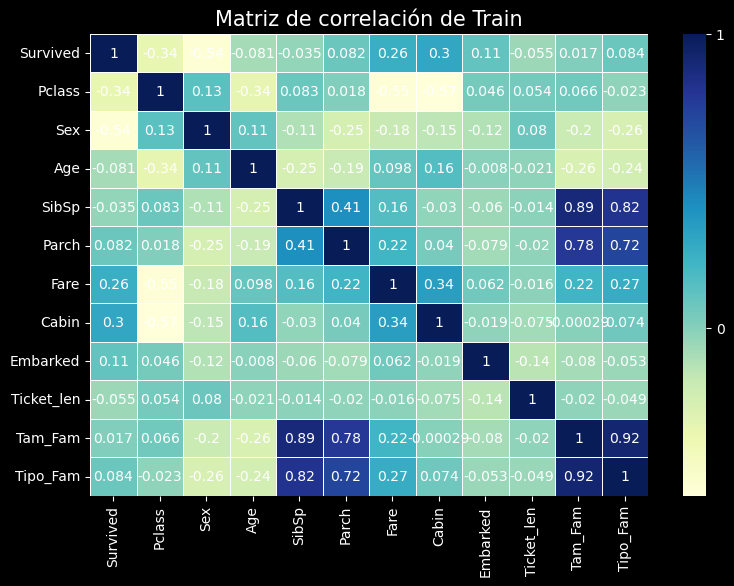

In [95]:
df_numeric = df_train_cleaned.select_dtypes(include = ["number"])
corr = df_numeric.corr()

plt.figure(figsize = (9, 6))

sns.heatmap(corr, annot = True, cmap = "YlGnBu", annot_kws = {"color": "white"},
            cbar_kws = {"ticks": [-1, 0, 1], "orientation": "vertical"},
            linewidths = 0.5, linecolor="white")

plt.title("Matriz de correlación de Train", fontsize = 15)

plt.show()

### Test

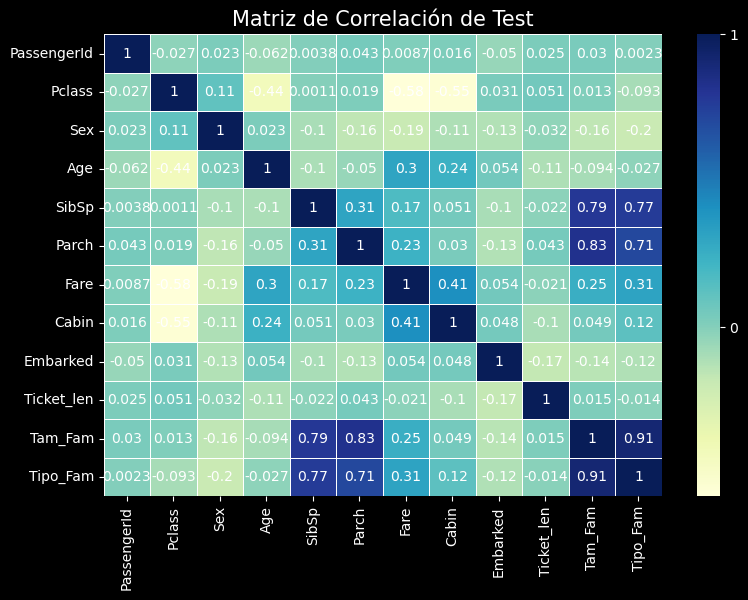

In [96]:
df_numeric = test_df_cleaned.select_dtypes(include = ["number"])
corr = df_numeric.corr()

plt.figure(figsize = (9, 6))

sns.heatmap(corr, annot = True, cmap = "YlGnBu", annot_kws = {"color": "white"},
            cbar_kws = {"ticks": [-1, 0, 1], "orientation": "vertical"},
            linewidths = 0.5, linecolor = "white")

plt.title("Matriz de Correlación de Test", fontsize = 15)

plt.show()

---

## **Referencias**

---

https://www.kaggle.com/code/abhinavatall/titanic-dataset-top-3-accuracy-with-ensambling

https://www.kaggle.com/code/vinothan/titanic-model-with-90-accuracy